In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
%matplotlib inline

sys.path.append('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/results/paper')

## Virus Abundance Plot

In [4]:
df = pd.read_csv('virus_abundance_data.csv', index_col=0)
df.head()

,batch,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,"Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102",Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,...,"Torque teno mini virus 10 isolate LIL-y1 ORF2, ORF1, ORF3, and ORF4 genes, complete cds","Torque teno midi virus 8 DNA, isolate: MDJN1",Hepatitis C virus genotype 1,Lactobacillus phage Lv-1,Woodchuck hepatitis virus,Pseudomonas phage EL,Enterobacteria phage RB32,Bordetella phage BIP-1,Staphylococcus phage SAP-26,Enterococcus phage phiFL4A
03C23190 - LCL - AU1157,batch_01009,0.0,1085585.0,NaN,0.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23194 - WB - AU1157,batch_01009,0.0,1064727.0,NaN,0.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23208 - WB - AU1157,batch_01009,0.0,1090048.0,NaN,0.0,NaN,0.0,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23209 - WB - AU1157,batch_01009,0.0,1057893.0,NaN,1.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23211 - WB - AU1157,batch_01009,0.0,1231973.0,NaN,1.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
column_labels = {x: x.split(', ')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)

type_col = [x.split(' - ')[1] for x in list(df.index)]
df['type'] = type_col
df.head()

,batch,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,"Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102",Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,...,"Torque teno midi virus 8 DNA, isolate: MDJN1",Hepatitis C virus genotype 1,Lactobacillus phage Lv-1,Woodchuck hepatitis virus,Pseudomonas phage EL,Enterobacteria phage RB32,Bordetella phage BIP-1,Staphylococcus phage SAP-26,Enterococcus phage phiFL4A,type
03C23190 - LCL - AU1157,batch_01009,0.0,1085585.0,NaN,0.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCL
03C23194 - WB - AU1157,batch_01009,0.0,1064727.0,NaN,0.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23208 - WB - AU1157,batch_01009,0.0,1090048.0,NaN,0.0,NaN,0.0,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23209 - WB - AU1157,batch_01009,0.0,1057893.0,NaN,1.0,NaN,0.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23211 - WB - AU1157,batch_01009,0.0,1231973.0,NaN,1.0,NaN,0.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB


In [12]:
columns = list(df.columns[:52])
columns.append('type')

# take top 50
df_melt = pd.melt(df.loc[:, columns].reset_index(), id_vars=['index', 'batch', 'type'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)

In [13]:
df_melt.head()

,index,batch,type,virus,read counts
0,03C23190 - LCL - AU1157,batch_01009,LCL,Human herpesvirus 6B,0.0
1,03C23194 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0
2,03C23208 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0
3,03C23209 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0
4,03C23211 - WB - AU1157,batch_01009,WB,Human herpesvirus 6B,0.0


In [7]:
print(df['batch'].nunique())

54


help: https://stackoverflow.com/questions/38650895/how-do-i-add-multiple-markers-to-a-stripplot-in-seaborn

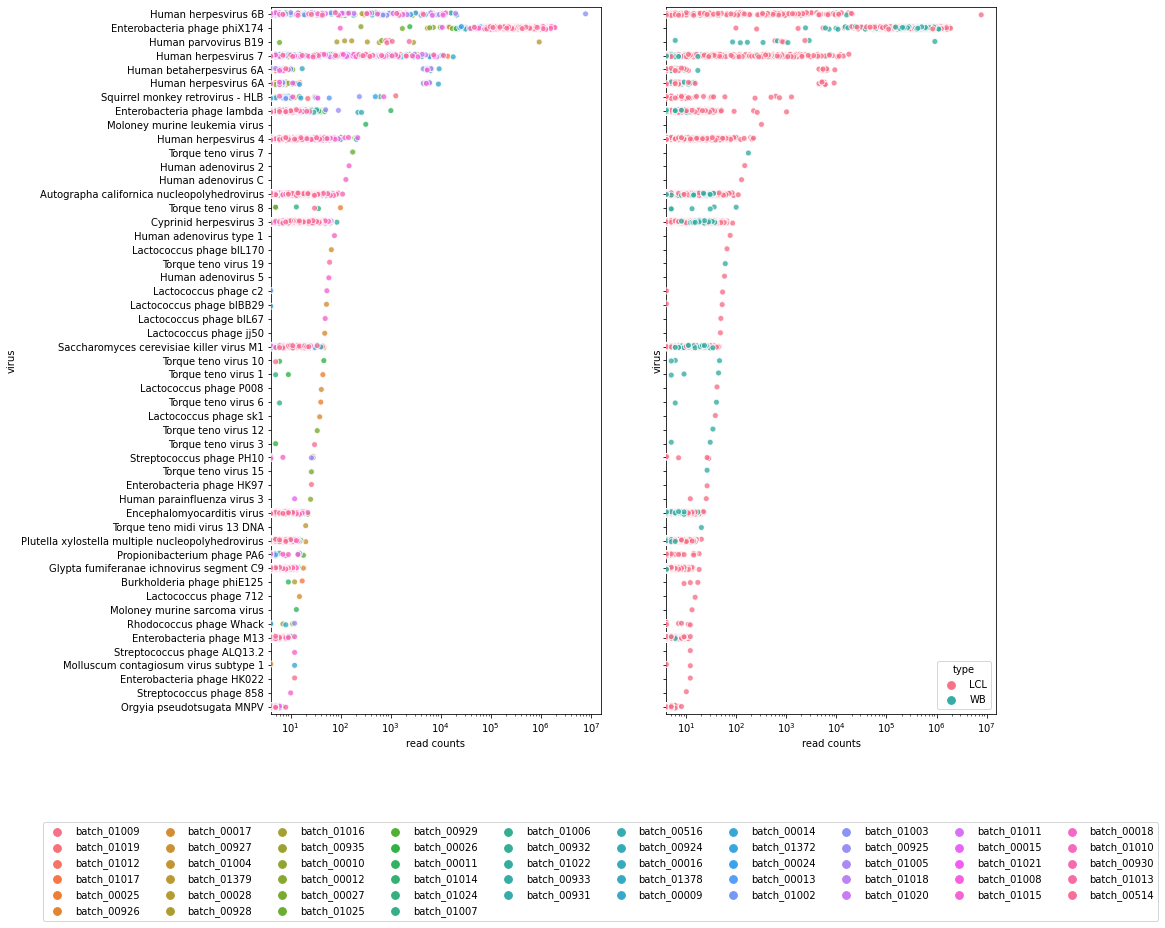

In [21]:
fig, axes = plt.subplots(figsize=(13,13), sharex=True, sharey=True)
ax1 = plt.subplot(121)
ax1.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(1, -0.3), ncol=10)

ax2 = plt.subplot(122)
ax2.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='type', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

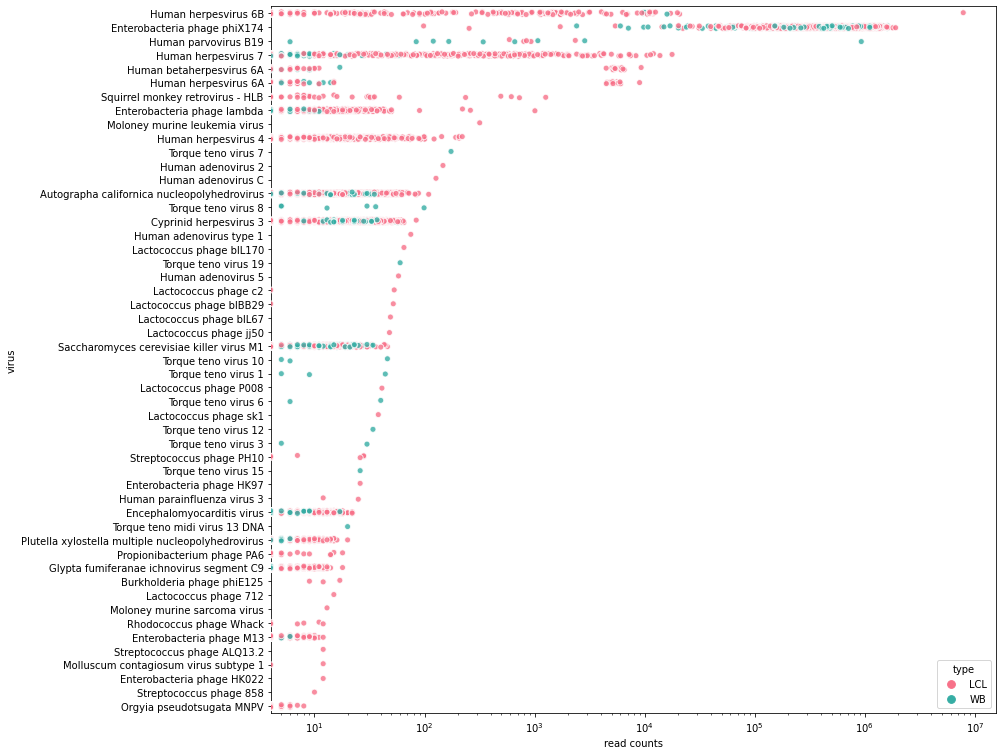

In [14]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='type', orient='h', alpha=0.8,
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# # plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# plt.show()

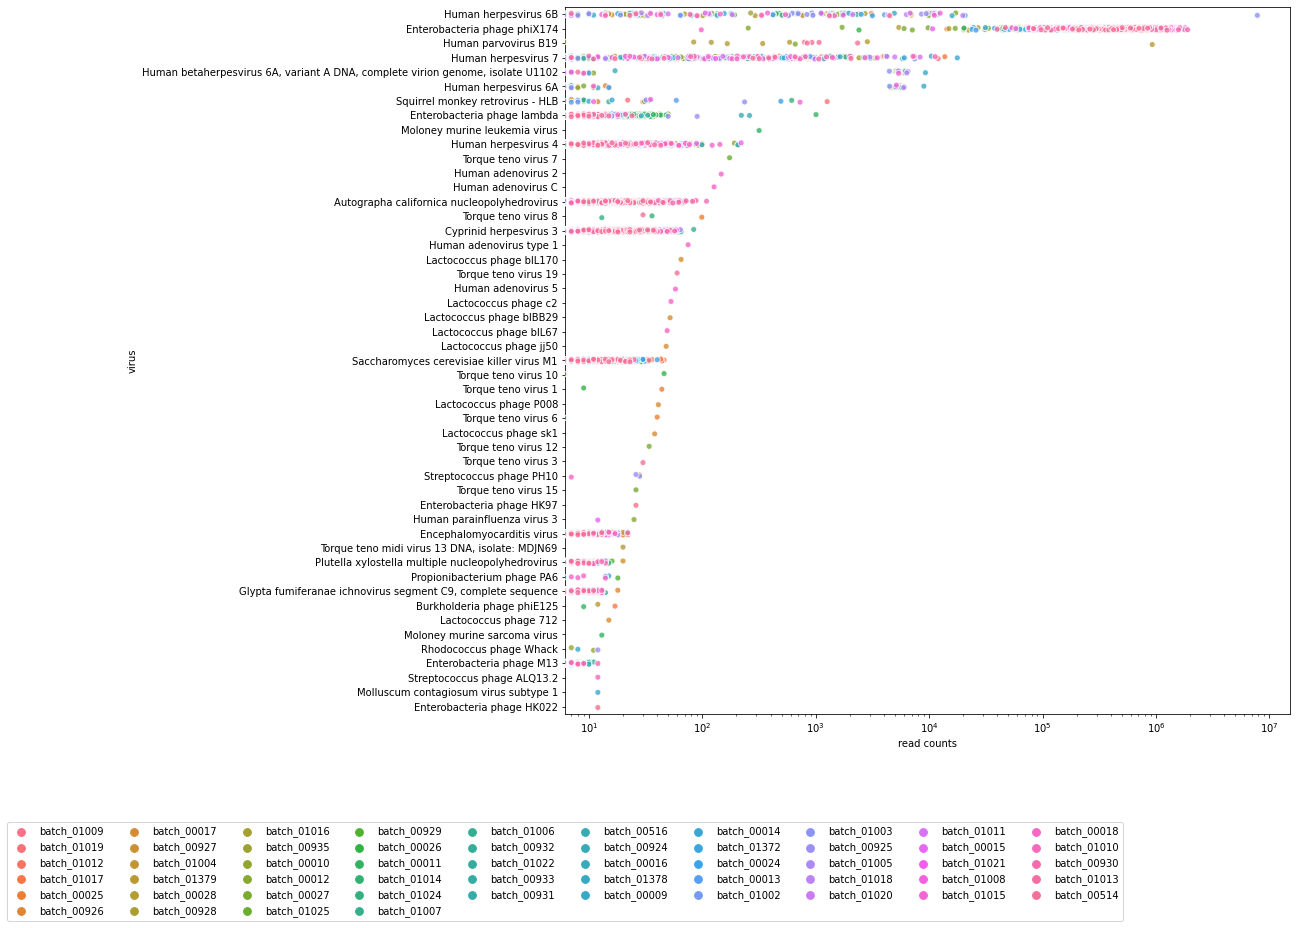

In [10]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# plt.show()

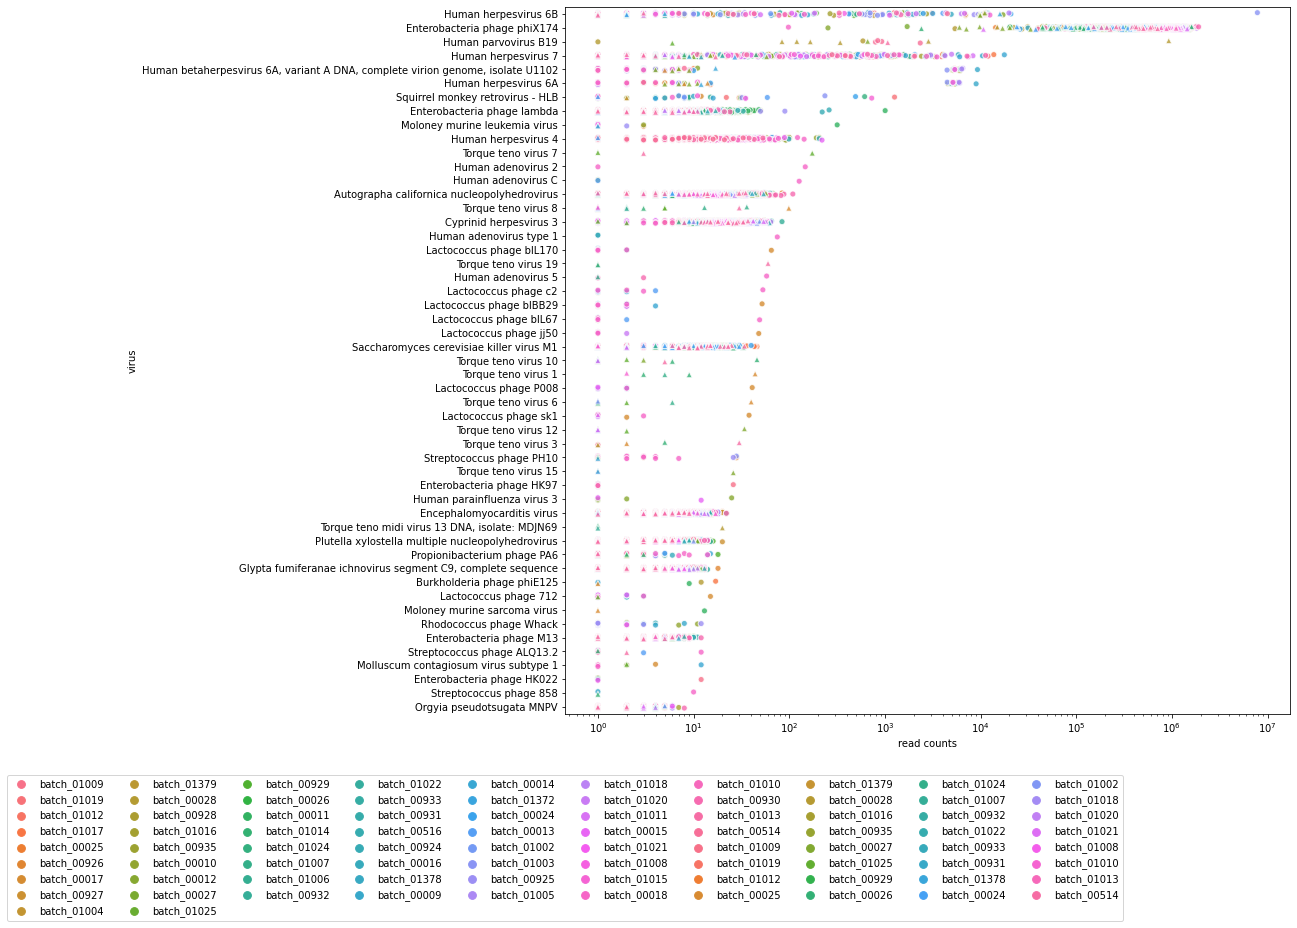

In [31]:
# # duplicate legends/coloring?

# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# m = sns.stripplot(data=df_melt[df_melt['type'] == 'LCL'], x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                   linewidth=1, size=6, edgecolor='white', palette='husl', marker='o')
# n = sns.stripplot(data=df_melt[df_melt['type'] == 'WB'], x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
#                   linewidth=1, size=6, edgecolor='white', palette='husl', marker='^')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# # handles, labels = n.get_legend_handles_labels()
# # n.legend(handles[:4], labels[:4])
# plt.show()

## Microbes Abundance Plot

In [22]:
df = pd.read_csv('bacteria_abundance_data.csv', index_col=0)
df.head()

,batch,Pseudomonas fluorescens SBW25,"Fusobacterium ulcerans ATCC 49185 NZ_ACDH01000101,","Mollicutes bacterium D7 cont1.210, whole genome sh",Burkholderia sp. 383 chromosome 1,"Burkholderia sp. 383 chromosome 2, complete sequen",Burkholderia cenocepacia J2315 chromosome chromoso,Burkholderia cenocepacia MC0-3 chromosome 1,Burkholderia cenocepacia J2315 chromosome 2,"Burkholderia cenocepacia MC0-3 chromosome 2, compl",...,"Acinetobacter baumannii AB056 NZ_ADGZ01000108, who","Pseudomonas sp. UK4 Contig495, whole genome shotgu","Staphylococcus epidermidis W23144 contig00191, who","Hoeflea phototrophica DFL-43 1103279223836, whole","Pseudomonas sp. UK4 Contig1181, whole genome shotg","Peptostreptococcus anaerobius 653-L contig00053, w",Candida glabrata CBS 138 chromosome K,"Beggiatoa sp. PS contig24012, whole genome shotgun","Staphylococcus warneri L37603 contig00076, whole g","Desulfuromonas acetoxidans DSM 684 ctg63, whole ge"
03C23190 - LCL - AU1157,batch_01009,1.0,188121.0,165779.0,12.0,6.0,6.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23194 - WB - AU1157,batch_01009,1.0,221493.0,192315.0,10.0,4.0,11.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23208 - WB - AU1157,batch_01009,1.0,234.0,164.0,10.0,5.0,4.0,7.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23209 - WB - AU1157,batch_01009,1.0,196992.0,170795.0,5.0,5.0,3.0,8.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03C23211 - WB - AU1157,batch_01009,3.0,198470.0,170048.0,9.0,5.0,6.0,2.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
column_labels = {x: x.split(',')[0] for x in df.columns}
df.rename(columns=column_labels, inplace=True)

type_col = [x.split(' - ')[1] for x in list(df.index)]
df['type'] = type_col
df.head()

,batch,Pseudomonas fluorescens SBW25,Fusobacterium ulcerans ATCC 49185 NZ_ACDH01000101,Mollicutes bacterium D7 cont1.210,Burkholderia sp. 383 chromosome 1,Burkholderia sp. 383 chromosome 2,Burkholderia cenocepacia J2315 chromosome chromoso,Burkholderia cenocepacia MC0-3 chromosome 1,Burkholderia cenocepacia J2315 chromosome 2,Burkholderia cenocepacia MC0-3 chromosome 2,...,Pseudomonas sp. UK4 Contig495,Staphylococcus epidermidis W23144 contig00191,Hoeflea phototrophica DFL-43 1103279223836,Pseudomonas sp. UK4 Contig1181,Peptostreptococcus anaerobius 653-L contig00053,Candida glabrata CBS 138 chromosome K,Beggiatoa sp. PS contig24012,Staphylococcus warneri L37603 contig00076,Desulfuromonas acetoxidans DSM 684 ctg63,type
03C23190 - LCL - AU1157,batch_01009,1.0,188121.0,165779.0,12.0,6.0,6.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCL
03C23194 - WB - AU1157,batch_01009,1.0,221493.0,192315.0,10.0,4.0,11.0,7.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23208 - WB - AU1157,batch_01009,1.0,234.0,164.0,10.0,5.0,4.0,7.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23209 - WB - AU1157,batch_01009,1.0,196992.0,170795.0,5.0,5.0,3.0,8.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB
03C23211 - WB - AU1157,batch_01009,3.0,198470.0,170048.0,9.0,5.0,6.0,2.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WB


In [31]:
columns = list(df.columns[:52])
columns.append('type')

# take top 50
df_melt = pd.melt(df.loc[:, columns].reset_index(), id_vars=['index', 'batch', 'type'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)

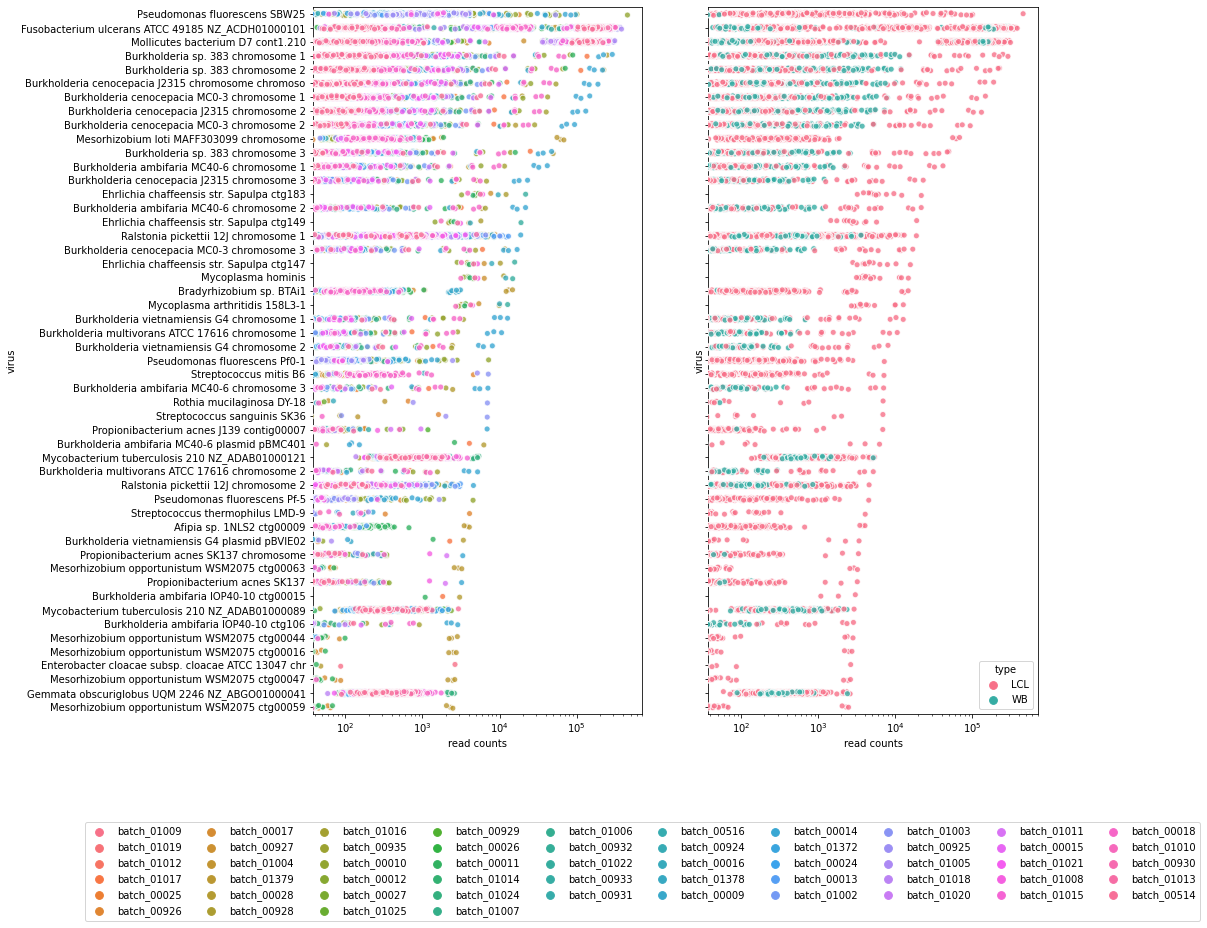

In [32]:
fig, axes = plt.subplots(figsize=(13,13), sharex=True, sharey=True)
ax1 = plt.subplot(121)
ax1.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(1, -0.3), ncol=10)

ax2 = plt.subplot(122)
ax2.set(xscale="log")
sns.stripplot(data=df_melt, x='read counts', y='virus', hue='type', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

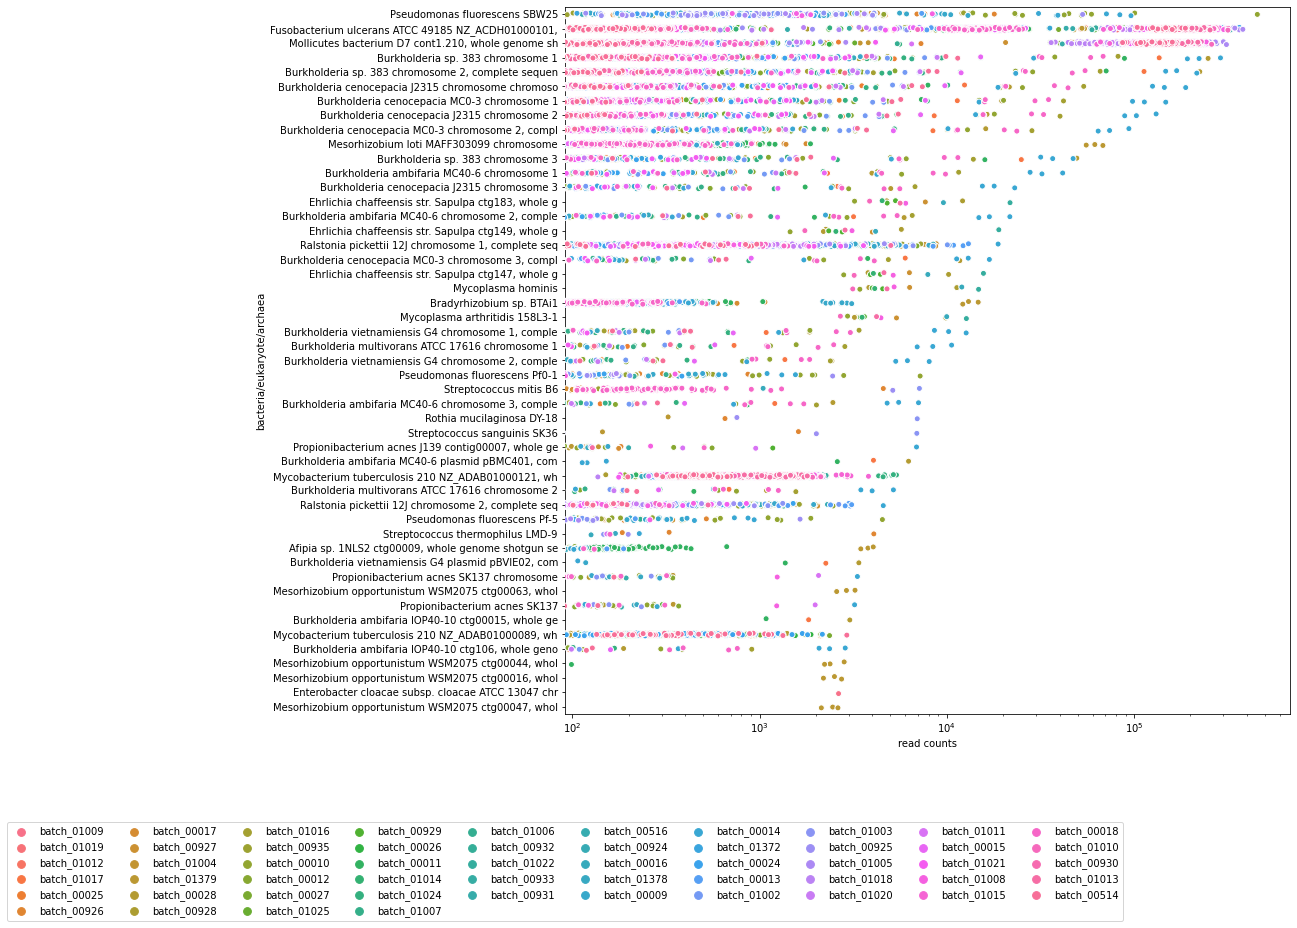

In [18]:
# fig, ax = plt.subplots(figsize=(13,13))
# ax.set(xscale="log")
# chart = sns.stripplot(data=df_melt, x='read counts', y='bacteria/eukaryote/archaea', hue='batch', orient='h', 
#                       linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
# plt.show()